In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
%matplotlib inline


In [124]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [125]:
from IPython.display import HTML
style = "<style>svg{width: 70% !important; height: 60% !important;} </style>"
HTML(style)

In [126]:
titanic_data = pd.read_csv('train.csv')

In [127]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [128]:
X = titanic_data.drop(["PassengerId",'Survived','Name','Ticket','Cabin'], axis=1)
y = titanic_data.Survived
X.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [129]:
# дерево решений не умеет работь со строковыми и Nan значениями
    
X = pd.get_dummies(X) # заменяем номинативные переменные числами

X = X.fillna({'Age': X.Age.median()}) # заменяем Nan значения медианой возраста

In [130]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [131]:
X = X.fillna({'Age': X.Age.median()})

In [132]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [133]:
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

In [134]:
from sklearn.model_selection import train_test_split


In [135]:
# делим датасет на тренировочный и тестовый, чтобы проверить эффективность обучения модели
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.33,random_state = 42)

In [136]:
X_train.shape

(596, 10)

In [137]:
X_test.shape

(295, 10)

In [138]:
# модель хорошо обучилась только для конкретной выборки
# с данными которая он не видела она справляется хуже
clf = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train,y_train)

In [139]:
clf.score(X_train,y_train)

0.9798657718120806

In [140]:
clf.score(X_test,y_test)

0.7762711864406779

In [141]:
# задаем макс шлубину обучения модели max_depth, чтобы не переобучалась
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3).fit(X_train,y_train)

In [142]:
clf.score(X_train,y_train)

0.8238255033557047

In [143]:
clf.score(X_test,y_test)

0.8203389830508474

In [144]:
max_depth_values = range(1,100)

In [145]:
scores_data = pd.DataFrame()

In [146]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train,y_train)
    train_score = clf.score(X_train,y_train)
    test_score = clf.score(X_test,y_test)
    mean_cross_val_score = cross_val_score(clf,X_train,y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth':[max_depth],
                                    'train_score':[train_score],
                                    'test_score':[test_score],
                                    'cross_val_score':[mean_cross_val_score]})
    
    scores_data = scores_data.append(temp_score_data)

In [147]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.806780,0.802073


In [148]:
# преобразуем датафрейм с помощью функции melt
scores_data_long = pd.melt(scores_data, id_vars='max_depth', 
                           value_vars=['train_score','test_score','cross_val_score'], 
                           var_name='set_type', value_name='score')
                                

In [149]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


<AxesSubplot:xlabel='max_depth', ylabel='score'>

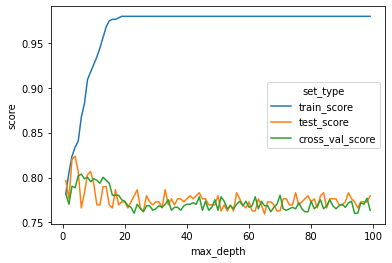

In [150]:
sns.lineplot(data=scores_data_long, x="max_depth", y="score", hue="set_type")

In [151]:
scores_data_long.query('set_type == "cross_val_score"').head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.802073
203,6,cross_val_score,0.803754
204,7,cross_val_score,0.798697
205,8,cross_val_score,0.800364
206,9,cross_val_score,0.795308
207,10,cross_val_score,0.798669


In [152]:
from sklearn.model_selection import cross_val_score

In [153]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [154]:
cross_val_score(clf,X_train,y_train, cv=5).mean()

0.8070728291316526

In [155]:
cross_val_score(clf,X_test,y_test, cv=5).mean()

0.7932203389830509